Exploratory

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
retail_df = pd.read_csv("retail_sales_dataset.csv")
retail_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
retail_df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
retail_df.describe(include = "all")

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


In [7]:
retail_df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [8]:
categorical_attributes= retail_df["Gender"].value_counts()
categorical_attributes

Gender
Female    510
Male      490
Name: count, dtype: int64

In [9]:
retail_df['Date'] = pd.to_datetime(retail_df['Date'], format = '%Y-%m-%d')
retail_df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [10]:
category_count = retail_df["Product Category"].value_counts()
category_count

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [15]:
retail_df["Price per Unit"].mean()

179.89

In [16]:
retail_df["Quantity"].sum()

2514

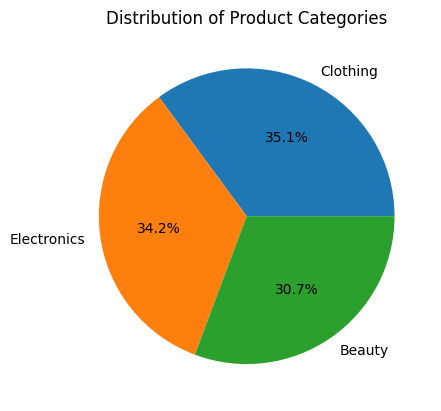

In [11]:
categories = category_count.index
counts = category_count.values

plt.pie(counts, labels=categories, autopct='%1.1f%%')
plt.title('Distribution of Product Categories')
plt.show()

<Figure size 600x400 with 0 Axes>

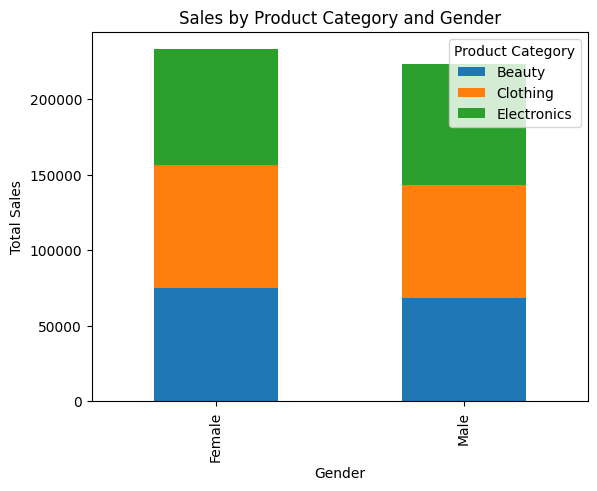

In [12]:
gender_category_sales = retail_df.groupby(["Gender" , "Product Category"])["Total Amount"].sum().unstack()
plt.figure(figsize=(6,4))
gender_category_sales.plot(kind = "bar", stacked = True)
plt.title("Sales by Product Category and Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.show()

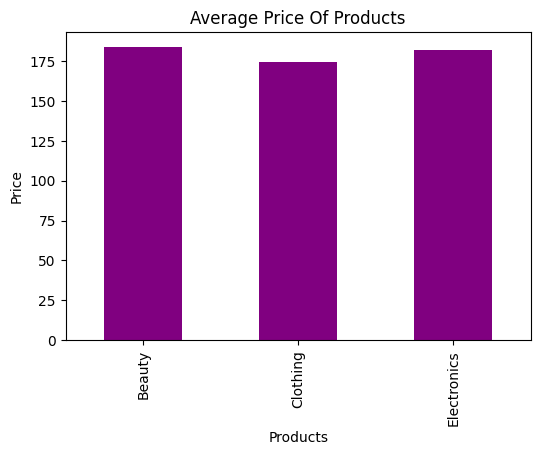

In [19]:
avg_price = retail_df.groupby("Product Category")["Price per Unit"].mean()
plt.figure(figsize=(6,4))
avg_price.plot(kind = "bar", color = "purple")
plt.title("Average Price Of Products")
plt.xlabel("Products")
plt.ylabel("Price")
plt.show()

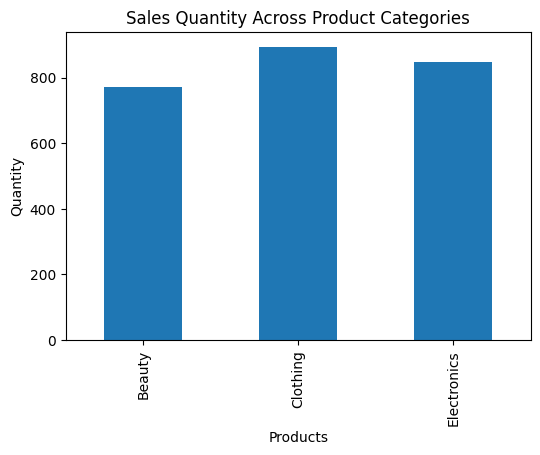

In [18]:
quantity = retail_df.groupby("Product Category")["Quantity"].sum()
plt.figure(figsize=(6,4))
quantity.plot(kind = "bar" color=)
plt.title("Sales Quantity Across Product Categories")
plt.xlabel("Products")
plt.ylabel("Quantity")
plt.show()

Text(0.5, 1.0, 'Beauty Sales Over Time')

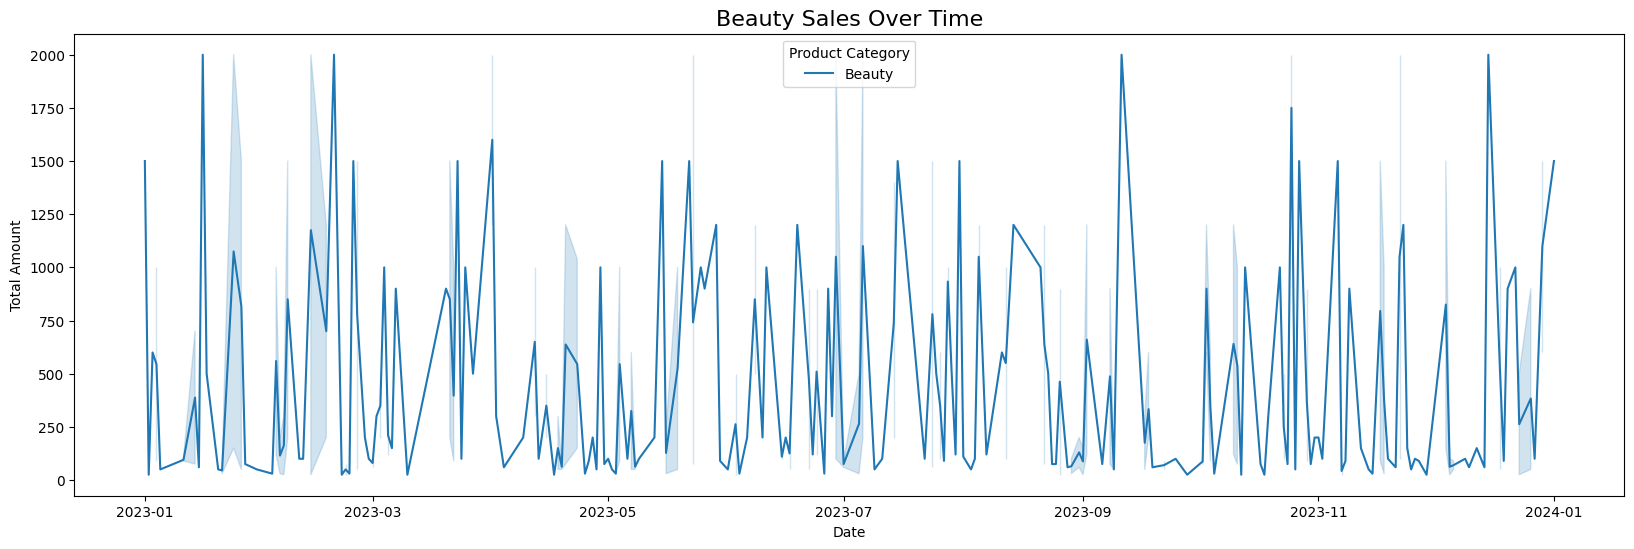

In [33]:
fig = plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=retail_df[retail_df['Product Category'].isin(['Beauty'])], x='Date', y='Total Amount', hue='Product Category')
ax.set_title("Beauty Sales Over Time", size=16)

Text(0.5, 1.0, 'Clothing Sales Over Time')

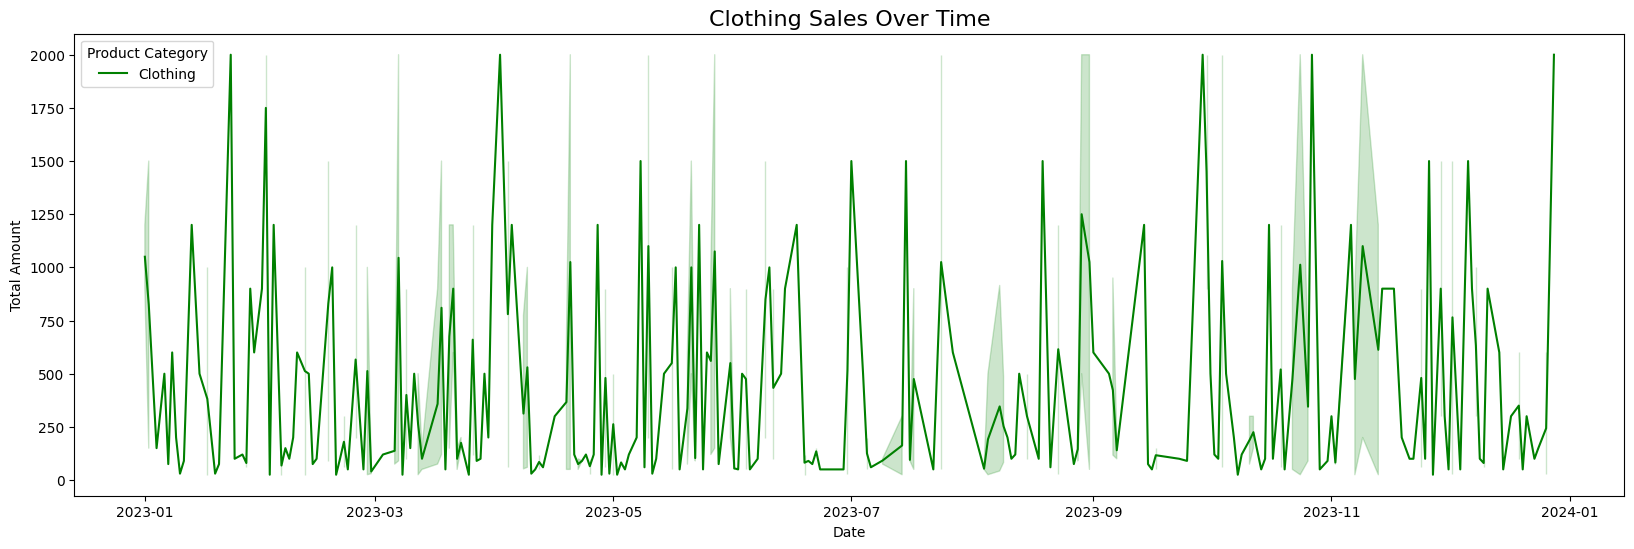

In [34]:
custom_palette = {'Clothing': 'green'}
fig = plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=retail_df[retail_df['Product Category'].isin(['Clothing'])], x='Date', y='Total Amount', hue='Product Category', palette=custom_palette)
ax.set_title("Clothing Sales Over Time", size=16)

Text(0.5, 1.0, 'Electronics Sales Over Time')

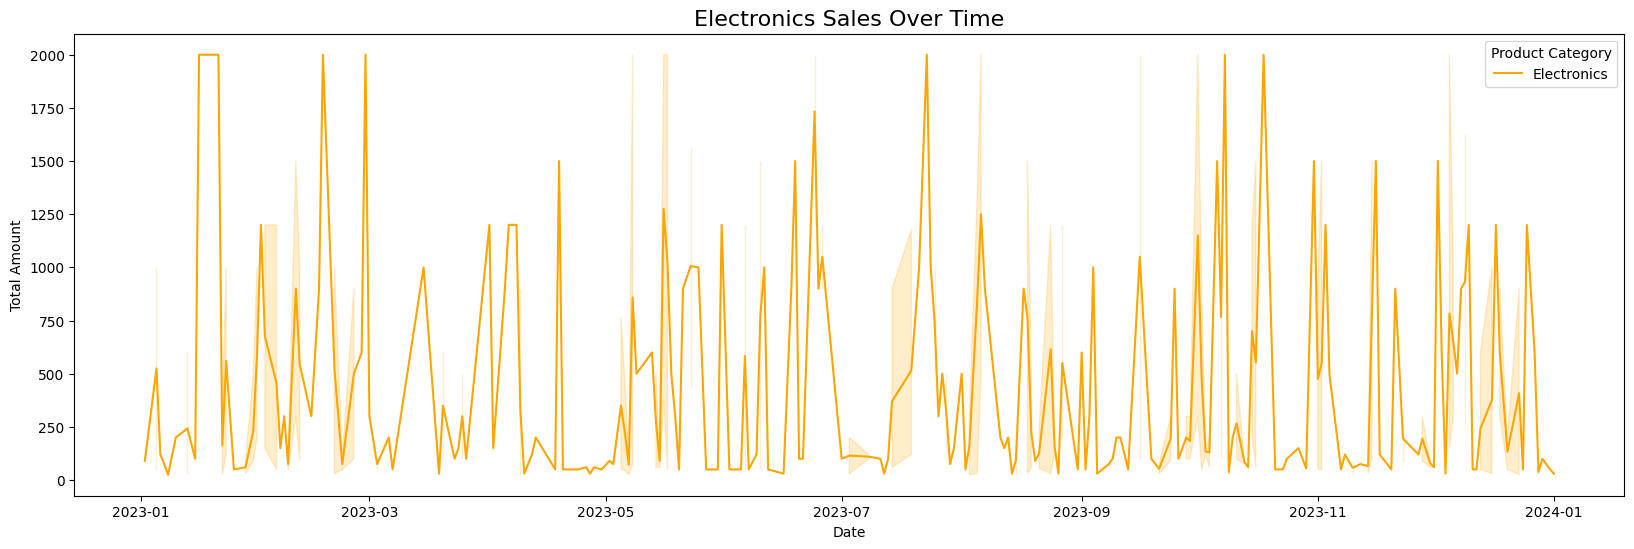

In [35]:
custom_palette = {'Electronics': 'orange'}
fig = plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=retail_df[retail_df['Product Category'].isin(['Electronics'])], x='Date', y='Total Amount', hue='Product Category', palette=custom_palette)
ax.set_title("Electronics Sales Over Time", size=16)

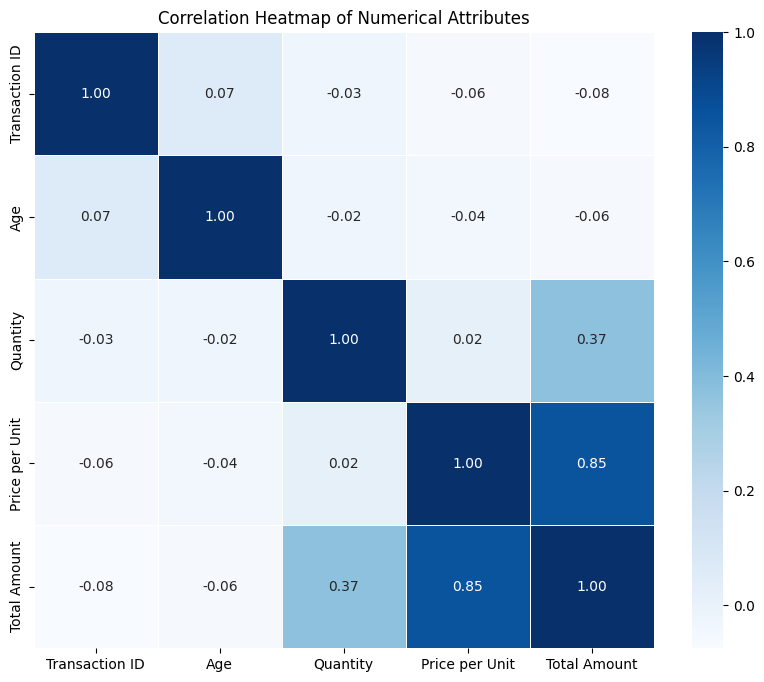

In [44]:
numerical_attributes = ['Transaction ID', 'Age','Quantity', 'Price per Unit', 'Total Amount']
correlation_matrix = retail_df[numerical_attributes].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Attributes')
plt.show()